In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append("..")
from basic_tools import *
from resnet_tripAtt import *
print(torch.cuda.is_available())

True


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
learning_rate=0.05
momentum=0.9
weight_decay=0.0001
batch_size=128
start_epoch=0
epochs=20
data_path='./data'
model_name='ResNet18_TripletAtt_'+'epoch='+str(epochs)
print(device)
model=ResNet_TripAtt(18, 100).to(device)
criterion=nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

cuda:0


In [3]:
trainloader,testloader=get_data_loaders(train_batch_size=batch_size,test_batch_size=batch_size,data_path=data_path)

epoch:0,train_loss:3.7012,train_acc:12.5240,train_top5_acc:35.5340,test_loss:3.4819,test_acc:16.4800,test_top5_acc:43.6300
epoch:1,train_loss:2.7849,train_acc:28.4600,train_top5_acc:60.5220,test_loss:2.7755,test_acc:32.4800,test_top5_acc:63.1300
epoch:2,train_loss:2.1815,train_acc:41.0500,train_top5_acc:74.2640,test_loss:2.1899,test_acc:42.1900,test_top5_acc:74.3600
epoch:3,train_loss:1.8168,train_acc:49.5640,train_top5_acc:81.1280,test_loss:1.9967,test_acc:46.7400,test_top5_acc:77.4000
epoch:4,train_loss:1.5745,train_acc:55.4840,train_top5_acc:85.4360,test_loss:1.7475,test_acc:51.3000,test_top5_acc:82.2400
epoch:5,train_loss:1.3849,train_acc:60.4020,train_top5_acc:88.2900,test_loss:1.5560,test_acc:56.5900,test_top5_acc:85.0700
epoch:6,train_loss:1.2370,train_acc:64.2060,train_top5_acc:90.1960,test_loss:1.6753,test_acc:55.3600,test_top5_acc:84.2800
epoch:7,train_loss:1.1105,train_acc:67.3560,train_top5_acc:92.0440,test_loss:1.4624,test_acc:60.1800,test_top5_acc:86.6800
epoch:8,train_lo

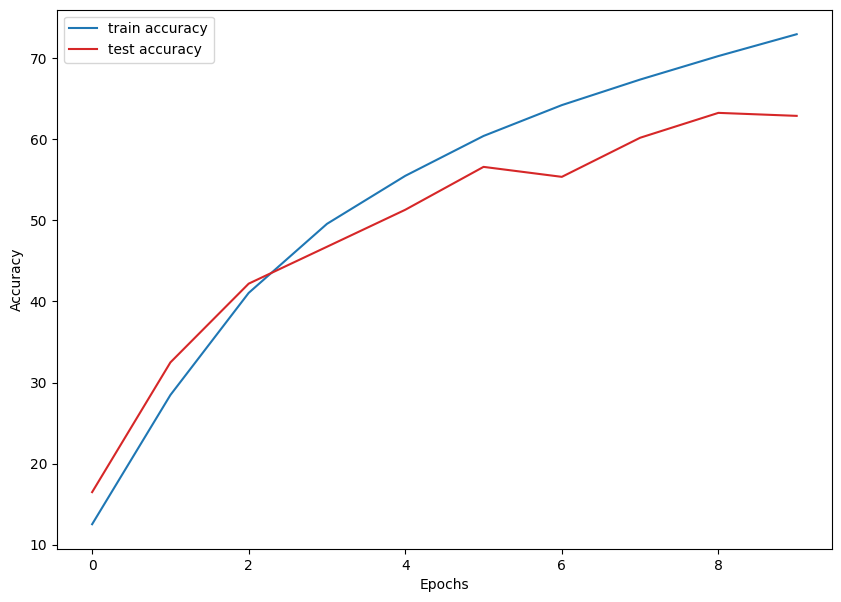

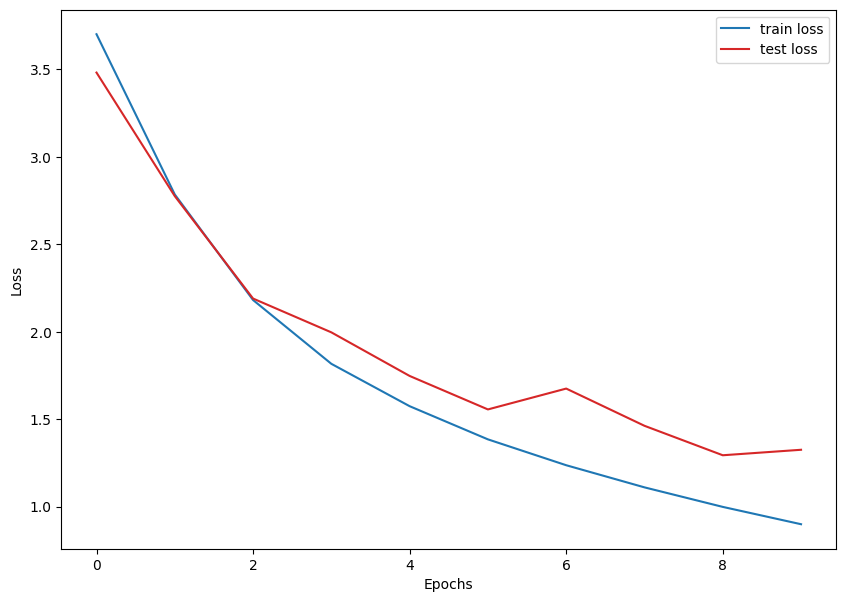

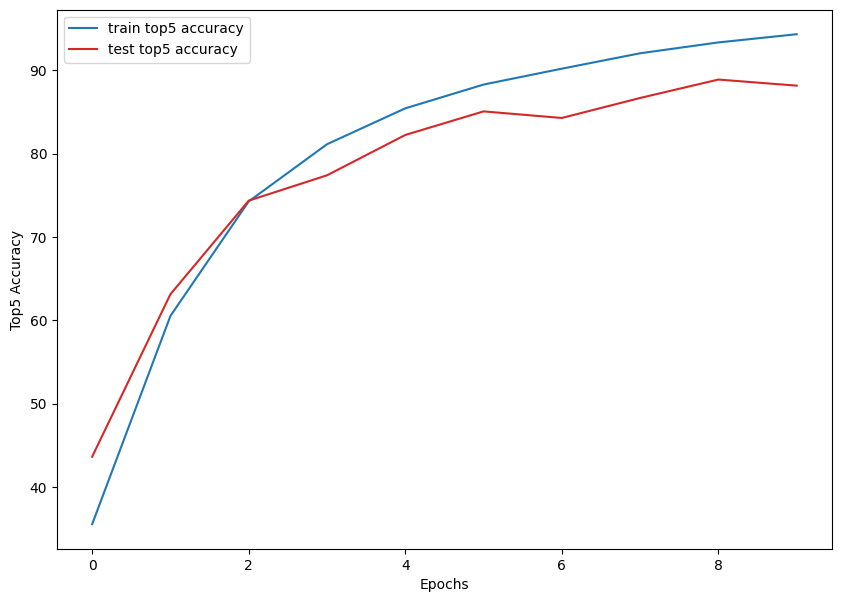

In [4]:
train_lossa, test_lossa = [], []
train_acca, test_acca = [], []
train_top5_acca, test_top5_acca = [], []
for epoch in range(start_epoch, epochs):
    train_loss,train_acc,train_top5_acc=train(model,trainloader,criterion,optimizer,device)
    test_loss,test_acc,test_top5_acc=test(model,testloader,criterion,device)
    print('epoch:{},train_loss:{:.4f},train_acc:{:.4f},train_top5_acc:{:.4f},test_loss:{:.4f},test_acc:{:.4f},test_top5_acc:{:.4f}'.format(epoch,train_loss,train_acc,train_top5_acc,test_loss,test_acc,test_top5_acc))
    #torch.save(model.state_dict(), model_name+'.pth')
    train_lossa.append(train_loss)
    test_lossa.append(test_loss)
    train_acca.append(train_acc)
    test_acca.append(test_acc)
    train_top5_acca.append(train_top5_acc)
    test_top5_acca.append(test_top5_acc)

save_plots(train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,model_name)
save_log(model_name,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca)
# save_model_info(model_name,model,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,learning_rate,epochs,momentum,weight_decay)

In [5]:
modelpath='../models/'
if not os.path.exists(modelpath):
    os.makedirs(modelpath)
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, modelpath+model_name+'.pth')
start_epoch=epochs

epoch:10,train_loss:0.8129,train_acc:75.1680,train_top5_acc:95.3020,test_loss:1.3196,test_acc:63.3700,test_top5_acc:89.2800
epoch:11,train_loss:0.7248,train_acc:77.7960,train_top5_acc:96.2680,test_loss:1.3378,test_acc:62.7100,test_top5_acc:88.3000
epoch:12,train_loss:0.6534,train_acc:79.8400,train_top5_acc:97.0160,test_loss:1.3146,test_acc:63.8000,test_top5_acc:88.8100
epoch:13,train_loss:0.5939,train_acc:81.4100,train_top5_acc:97.4920,test_loss:1.3120,test_acc:65.3500,test_top5_acc:89.7500
epoch:14,train_loss:0.5392,train_acc:83.1600,train_top5_acc:97.9400,test_loss:1.3015,test_acc:66.1600,test_top5_acc:89.6800


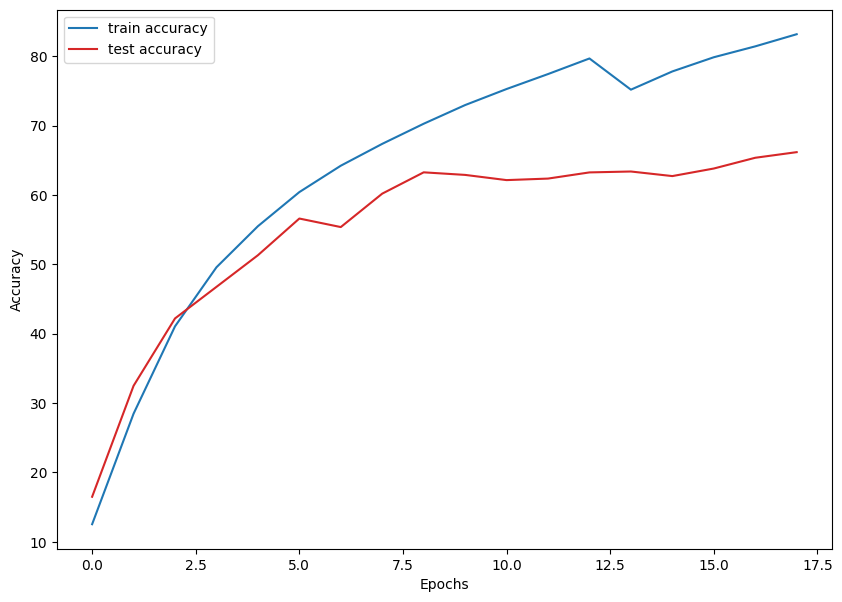

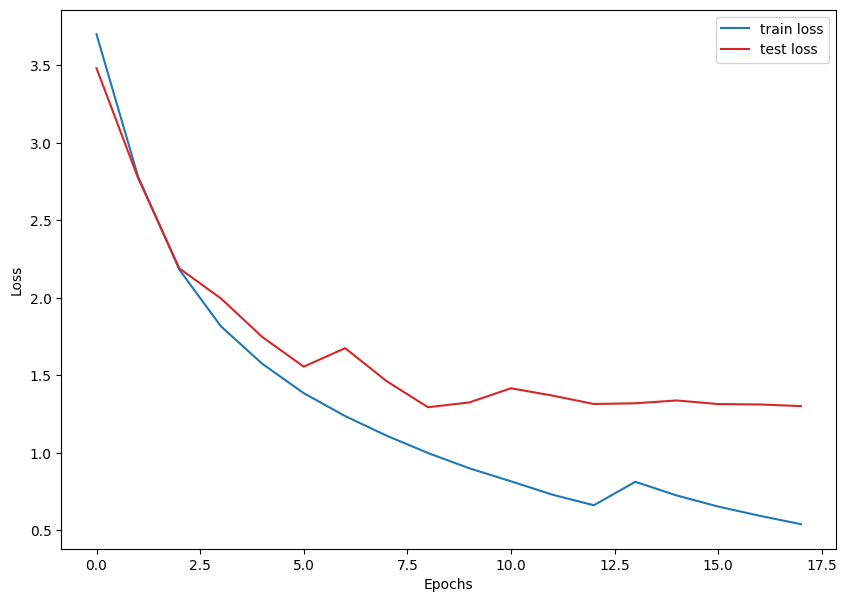

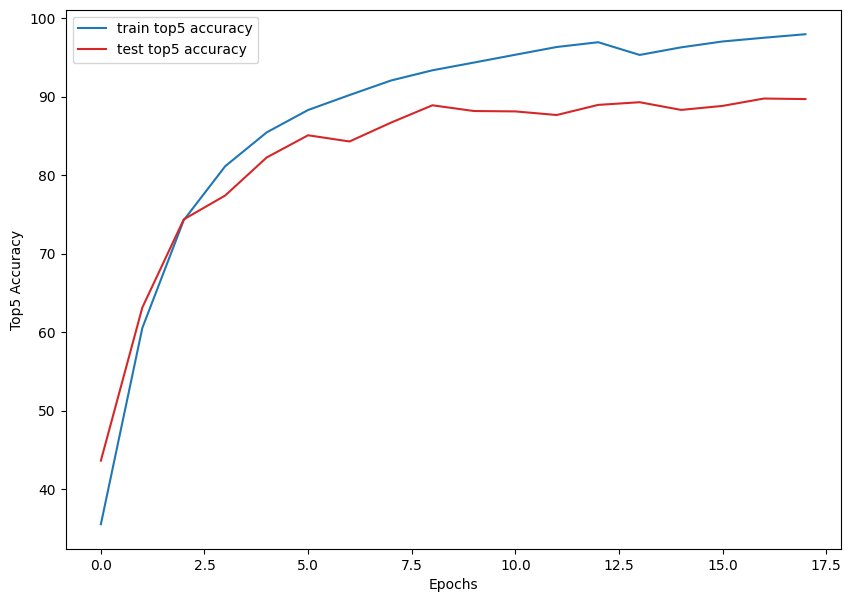

In [8]:
epochs+=5

model = ResNet_TripAtt(18, 100).to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
checkpoint = torch.load(modelpath+model_name+'.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# train_lossa, test_lossa = [], []
# train_acca, test_acca = [], []
# train_top5_acca, test_top5_acca = [], []
for epoch in range(start_epoch, epochs):
    train_loss,train_acc,train_top5_acc=train(model,trainloader,criterion,optimizer,device)
    test_loss,test_acc,test_top5_acc=test(model,testloader,criterion,device)
    print('epoch:{},train_loss:{:.4f},train_acc:{:.4f},train_top5_acc:{:.4f},test_loss:{:.4f},test_acc:{:.4f},test_top5_acc:{:.4f}'.format(epoch,train_loss,train_acc,train_top5_acc,test_loss,test_acc,test_top5_acc))
    #torch.save(model.state_dict(), model_name+'.pth')
    train_lossa.append(train_loss)
    test_lossa.append(test_loss)
    train_acca.append(train_acc)
    test_acca.append(test_acc)
    train_top5_acca.append(train_top5_acc)
    test_top5_acca.append(test_top5_acc)

save_plots(train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,model_name)
save_log(model_name,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca)
# save_model_info(model_name,model,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,learning_rate,epochs,momentum,weight_decay)

model_name='ResNet18_TripletAtt_'+'epoch='+str(epochs)
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, modelpath+model_name+'.pth')
start_epoch=epochs

epoch:15,train_loss:0.4767,train_acc:84.8380,train_top5_acc:98.4000,test_loss:1.2924,test_acc:66.3400,test_top5_acc:90.3800
epoch:16,train_loss:0.4328,train_acc:86.2960,train_top5_acc:98.7060,test_loss:1.3172,test_acc:66.1600,test_top5_acc:89.3600
epoch:17,train_loss:0.3903,train_acc:87.4020,train_top5_acc:99.0520,test_loss:1.3485,test_acc:65.1100,test_top5_acc:88.8500
epoch:18,train_loss:0.3525,train_acc:88.6680,train_top5_acc:99.1880,test_loss:1.4337,test_acc:66.4300,test_top5_acc:89.1700
epoch:19,train_loss:0.3069,train_acc:90.0680,train_top5_acc:99.4340,test_loss:1.4056,test_acc:66.1300,test_top5_acc:90.2000
epoch:20,train_loss:0.2855,train_acc:90.7800,train_top5_acc:99.5220,test_loss:1.3399,test_acc:66.9600,test_top5_acc:90.1100
epoch:21,train_loss:0.2586,train_acc:91.6340,train_top5_acc:99.7040,test_loss:1.7067,test_acc:64.7700,test_top5_acc:88.5000
epoch:22,train_loss:0.2210,train_acc:93.0720,train_top5_acc:99.7480,test_loss:1.5125,test_acc:65.8700,test_top5_acc:89.9800
epoch:23

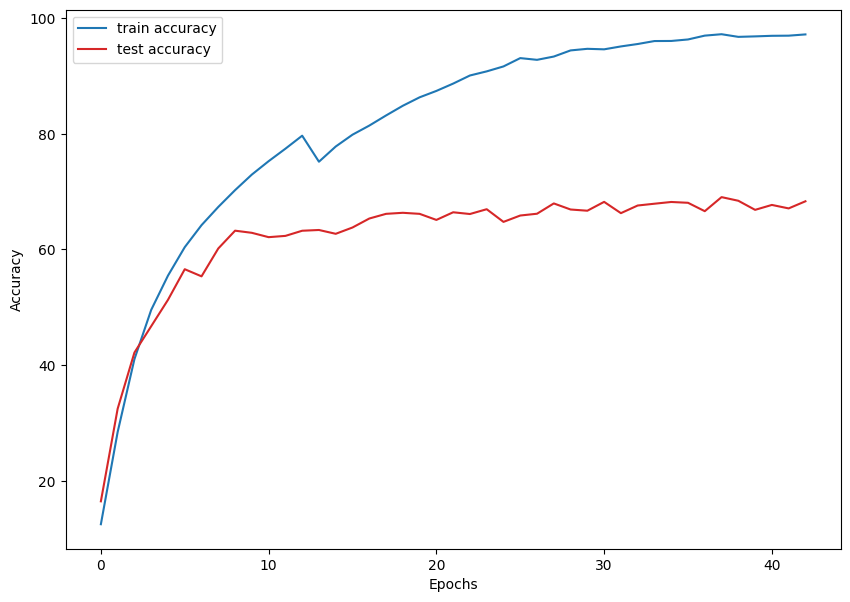

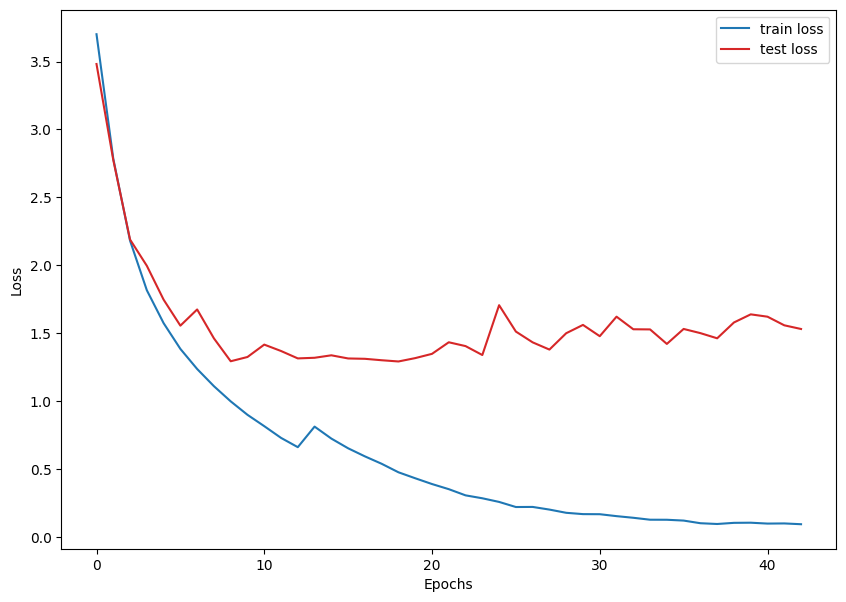

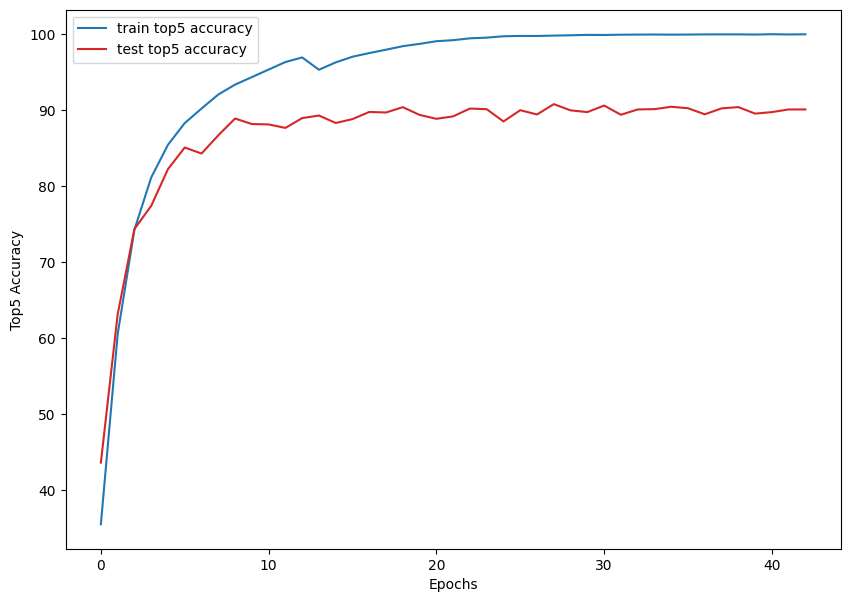

In [9]:
epochs+=25

model = ResNet_TripAtt(18, 100).to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
checkpoint = torch.load(modelpath+model_name+'.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# train_lossa, test_lossa = [], []
# train_acca, test_acca = [], []
# train_top5_acca, test_top5_acca = [], []
for epoch in range(start_epoch, epochs):
    train_loss,train_acc,train_top5_acc=train(model,trainloader,criterion,optimizer,device)
    test_loss,test_acc,test_top5_acc=test(model,testloader,criterion,device)
    print('epoch:{},train_loss:{:.4f},train_acc:{:.4f},train_top5_acc:{:.4f},test_loss:{:.4f},test_acc:{:.4f},test_top5_acc:{:.4f}'.format(epoch,train_loss,train_acc,train_top5_acc,test_loss,test_acc,test_top5_acc))
    #torch.save(model.state_dict(), model_name+'.pth')
    train_lossa.append(train_loss)
    test_lossa.append(test_loss)
    train_acca.append(train_acc)
    test_acca.append(test_acc)
    train_top5_acca.append(train_top5_acc)
    test_top5_acca.append(test_top5_acc)

save_plots(train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,model_name)
save_log(model_name,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca)
# save_model_info(model_name,model,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,learning_rate,epochs,momentum,weight_decay)

model_name='ResNet18_TripletAtt_'+'epoch='+str(epochs)
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, modelpath+model_name+'.pth')
start_epoch=epochs

In [ ]:
epochs+=20

model = ResNet_TripAtt(18, 100).to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
checkpoint = torch.load(modelpath+model_name+'.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# train_lossa, test_lossa = [], []
# train_acca, test_acca = [], []
# train_top5_acca, test_top5_acca = [], []
for epoch in range(start_epoch, epochs):
    train_loss,train_acc,train_top5_acc=train(model,trainloader,criterion,optimizer,device)
    test_loss,test_acc,test_top5_acc=test(model,testloader,criterion,device)
    print('epoch:{},train_loss:{:.4f},train_acc:{:.4f},train_top5_acc:{:.4f},test_loss:{:.4f},test_acc:{:.4f},test_top5_acc:{:.4f}'.format(epoch,train_loss,train_acc,train_top5_acc,test_loss,test_acc,test_top5_acc))
    #torch.save(model.state_dict(), model_name+'.pth')
    train_lossa.append(train_loss)
    test_lossa.append(test_loss)
    train_acca.append(train_acc)
    test_acca.append(test_acc)
    train_top5_acca.append(train_top5_acc)
    test_top5_acca.append(test_top5_acc)

save_plots(train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,model_name)
save_log(model_name,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca)
# save_model_info(model_name,model,train_acca,test_acca,train_lossa,test_lossa,train_top5_acca,test_top5_acca,learning_rate,epochs,momentum,weight_decay)

model_name='ResNet18_TripletAtt_'+'epoch='+str(epochs)
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, modelpath+model_name+'.pth')
start_epoch=epochs